In [1]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
import pandas as pd 
data = pd.read_csv('datasets/1429_1.csv')

In [3]:
data

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [4]:
data["reviews.rating"].replace(1.0, value = "negatif", inplace = True)
data["reviews.rating"].replace(2.0, value = "negatif", inplace = True)
data["reviews.rating"].replace(4.0, value = "pozitif", inplace = True)
data["reviews.rating"].replace(5.0, value = "pozitif", inplace = True)
data = data[(data['reviews.rating'] == "negatif") | (data['reviews.rating'] == "pozitif")] 

In [5]:
df = pd.DataFrame()
df["comment"] = data["reviews.text"]
df["sentiment"] = data["reviews.rating"]

In [6]:
#buyuk-kucuk donusumu
df['comment'] = df['comment'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [7]:
#noktalama işaretleri
df['comment'] = df['comment'].str.replace('[^\w\s]','')

In [8]:
#sayılar
df['comment'] = df['comment'].str.replace('\d','')

In [9]:
#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['comment'] = df['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [10]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(df['comment']).split()).value_counts()[-5000:]
df['comment'] = df['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [11]:
#lemmi
from textblob import Word
#nltk.download('wordnet')
df['comment'] = df['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 


In [12]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["comment"],
                                                                   df["sentiment"], 
                                                                    random_state = 1)
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

# özellik çıkarımı yöntemleri 

In [13]:
# count vektor
vectorizer = CountVectorizer() #ilk başta oluşturduğumuz train_x'i bozmamak için yeni vectorizer oluşturduk.
vectorizer.fit(train_x)
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [14]:
# tf-idf 
tf_idf_word_vectorizer = TfidfVectorizer() #ilk başta oluşturduğumuz train_x'i bozmamak için yeni vectorizer oluşturduk.
tf_idf_word_vectorizer.fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [15]:
# ngram level tf-idf
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

In [16]:
# character level tf-idf
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

# makine öğrenmesi sınıflandırma algoritmaları

# logistic reggression

In [17]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)

accuracy = model_selection.cross_val_score(loj_model, x_test_count, test_y, cv = 10).mean()
recall = model_selection.cross_val_score(loj_model, x_test_count, test_y, cv=10, scoring='recall').mean()
precision = model_selection.cross_val_score(loj_model, x_test_count, test_y, cv=10, scoring='precision').mean()
f1_score =  model_selection.cross_val_score(loj_model, x_test_count, test_y, cv=10, scoring='f1_macro').mean()

print("Count Vectors Doğruluk Oranı:", accuracy)
print("Count Vectors Recall:", recall)
print("Count Vectors Precision:", precision)
print("Count Vectors F1 Score:", f1_score)

Count Vectors Doğruluk Oranı: 0.9792322978036514
Count Vectors Recall: 0.9975301011765783
Count Vectors Precision: 0.9815360005844637
Count Vectors F1 Score: 0.6245093243872923


In [18]:
loj1 = linear_model.LogisticRegression()
loj_model1 = loj1.fit(x_train_tf_idf_word,train_y)

accuracy1 = model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv = 10).mean()
recall1 = model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv=10, scoring='recall').mean()
precision1 = model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv=10, scoring='precision').mean()
f1_score1 =  model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv=10, scoring='f1_macro').mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy1)
print("Word-Level TF-IDF Recall:", recall1)
print("Word-Level TF-IDF Precision:", precision1)
print("Word-Level TF-IDF F1 Score:", f1_score1)

Word-Level TF-IDF Doğruluk Oranı: 0.9777833138115302
Word-Level TF-IDF Recall: 1.0
Word-Level TF-IDF Precision: 0.9777833138115302
Word-Level TF-IDF F1 Score: 0.4943833935187409


In [19]:
loj2 = linear_model.LogisticRegression()
loj_model2 = loj2.fit(x_train_tf_idf_ngram,train_y)

accuracy2 = model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv = 10).mean()
recall2 = model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='recall').mean()
precision2 = model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='precision').mean()
f1_score2 =  model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='f1_macro').mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy2)
print("N-GRAM TF-IDF Recall:", recall2)
print("N-GRAM TF-IDF Precision:", precision2)
print("N-GRAM TF-IDF F1 Score:", f1_score2)

N-GRAM TF-IDF Doğruluk Oranı: 0.9777833138115302
N-GRAM TF-IDF Recall: 1.0
N-GRAM TF-IDF Precision: 0.9777833138115302
N-GRAM TF-IDF F1 Score: 0.4943833935187409


In [20]:
loj3 = linear_model.LogisticRegression()
loj_model3 = loj3.fit(x_train_tf_idf_chars,train_y)

accuracy3 = model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv = 10).mean()
recall3 = model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='recall').mean()
precision3 = model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='precision').mean()
f1_score3 =  model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='f1_macro').mean()

print("CHARLEVEL TF-IDF Doğruluk Oranı:", accuracy3)
print("CHARLEVEL TF-IDF Recall:", recall3)
print("CHARLEVEL TF-IDF Precision:", precision3)
print("CHARLEVEL TF-IDF F1 Score:", f1_score3)

CHARLEVEL TF-IDF Doğruluk Oranı: 0.97790408675839
CHARLEVEL TF-IDF Recall: 1.0
CHARLEVEL TF-IDF Precision: 0.9779016041222393
CHARLEVEL TF-IDF F1 Score: 0.49967675944612927


# naive bayes

In [21]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)

accuracy4 = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv = 10).mean()
recall4 = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv=10, scoring='recall').mean()
precision4 = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv=10, scoring='precision').mean()
f1_score4 =  model_selection.cross_val_score(nb_model, x_test_count, test_y, cv=10, scoring='f1_macro').mean()

print("Count Vectors Doğruluk Oranı:", accuracy4)
print("Count Vectors Recall:", recall4)
print("Count Vectors Precision:", precision4)
print("Count Vectors F1 Score:", f1_score4)

Count Vectors Doğruluk Oranı: 0.9777833138115302
Count Vectors Recall: 0.9997529338155624
Count Vectors Precision: 0.9780147774656024
Count Vectors F1 Score: 0.5043820501188645


In [22]:
nb1 = naive_bayes.MultinomialNB()
nb_model1 = nb1.fit(x_train_tf_idf_word,train_y)

accuracy5 = model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv = 10).mean()
recall5 = model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv=10, scoring='recall').mean()
precision5 = model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv=10, scoring='precision').mean()
f1_score5 =  model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv=10, scoring='f1_macro').mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy5)
print("Word-Level TF-IDF Recall:", recall5)
print("Word-Level TF-IDF Precision:", precision5)
print("Word-Level TF-IDF F1 Score:", f1_score5)

Word-Level TF-IDF Doğruluk Oranı: 0.9777833138115302
Word-Level TF-IDF Recall: 1.0
Word-Level TF-IDF Precision: 0.9777833138115302
Word-Level TF-IDF F1 Score: 0.4943833935187409


In [23]:
nb2 = naive_bayes.MultinomialNB()
nb_model2 = nb2.fit(x_train_tf_idf_ngram,train_y)

accuracy6 = model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv = 10).mean()
recall6 = model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='recall').mean()
precision6 = model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='precision').mean()
f1_score6 =  model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='f1_macro').mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy6)
print("N-GRAM TF-IDF Recall:", recall6)
print("N-GRAM TF-IDF Precision:", precision6)
print("N-GRAM TF-IDF F1 Score:", f1_score6)

N-GRAM TF-IDF Doğruluk Oranı: 0.9777833138115302
N-GRAM TF-IDF Recall: 1.0
N-GRAM TF-IDF Precision: 0.9777833138115302
N-GRAM TF-IDF F1 Score: 0.4943833935187409


In [24]:
nb3 = naive_bayes.MultinomialNB()
nb_model3 = nb3.fit(x_train_tf_idf_chars,train_y)

accuracy7 = model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv = 10).mean()
recall7 = model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='recall').mean()
precision7 = model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='precision').mean()
f1_score7 =  model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='f1_macro').mean()

print("CHARLEVEL TF-IDF Doğruluk Oranı:", accuracy7)
print("CHARLEVEL TF-IDF Recall:", recall7)
print("CHARLEVEL TF-IDF Precision:", precision7)
print("CHARLEVEL TF-IDF F1 Score:", f1_score7)

CHARLEVEL TF-IDF Doğruluk Oranı: 0.9777833138115302
CHARLEVEL TF-IDF Recall: 1.0
CHARLEVEL TF-IDF Precision: 0.9777833138115302
CHARLEVEL TF-IDF F1 Score: 0.4943833935187409


# random forest

In [25]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,train_y)

accuracy8 = model_selection.cross_val_score(rf_model, x_test_count, test_y, cv = 10).mean()
recall8 = model_selection.cross_val_score(rf_model, x_test_count, test_y, cv=10, scoring='recall').mean()
precision8 = model_selection.cross_val_score(rf_model, x_test_count, test_y, cv=10, scoring='precision').mean()
f1_score8 =  model_selection.cross_val_score(rf_model, x_test_count, test_y, cv=10, scoring='f1_macro').mean()

print("Count Vectors Doğruluk Oranı:", accuracy8)
print("Count Vectors Recall:", recall8)
print("Count Vectors Precision:", precision8)
print("Count Vectors F1 Score:", f1_score8)

Count Vectors Doğruluk Oranı: 0.9776625408646702
Count Vectors Recall: 0.9998765432098764
Count Vectors Precision: 0.9777806851379587
Count Vectors F1 Score: 0.49435251419647497


In [26]:
rf1 = ensemble.RandomForestClassifier()
rf_model1 = rf1.fit(x_train_tf_idf_word,train_y)

accuracy9 = model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv = 10).mean()
recall9 = model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv=10, scoring='recall').mean()
precision9 = model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv=10, scoring='precision').mean()
f1_score9 =  model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv=10, scoring='f1_macro').mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy9)
print("Word-Level TF-IDF Recall:", recall9)
print("Word-Level TF-IDF Precision:", precision9)
print("Word-Level TF-IDF F1 Score:", f1_score9)

Word-Level TF-IDF Doğruluk Oranı: 0.9775417679178103
Word-Level TF-IDF Recall: 0.9998765432098764
Word-Level TF-IDF Precision: 0.9780172657593772
Word-Level TF-IDF F1 Score: 0.4993827218188027


In [28]:
rf2 = ensemble.RandomForestClassifier()
rf_model2 = rf2.fit(x_train_tf_idf_ngram,train_y)

accuracy10 = model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv = 10).mean()
recall10 = model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='recall').mean()
precision10 = model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='precision').mean()
f1_score10 =  model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='f1_macro').mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy10)
print("N-GRAM TF-IDF Recall:", recall10)
print("N-GRAM TF-IDF Precision:", precision10)
print("N-GRAM TF-IDF F1 Score:", f1_score10)

KeyboardInterrupt: 

In [27]:
rf3 = ensemble.RandomForestClassifier()
rf_model3 = rf3.fit(x_train_tf_idf_chars,train_y)

accuracy11 = model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv = 10).mean()
recall11 = model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='recall').mean()
precision11 = model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='precision').mean()
f1_score11 =  model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='f1_macro').mean()

print("CHARLEVEL TF-IDF Doğruluk Oranı:", accuracy11)
print("CHARLEVEL TF-IDF Recall:", recall11)
print("CHARLEVEL TF-IDF Precision:", precision11)
print("CHARLEVEL TF-IDF F1 Score:", f1_score11)

CHARLEVEL TF-IDF Doğruluk Oranı: 0.9776625408646702
CHARLEVEL TF-IDF Recall: 0.9998765432098764
CHARLEVEL TF-IDF Precision: 0.977898975448668
CHARLEVEL TF-IDF F1 Score: 0.49435251419647497


# graph

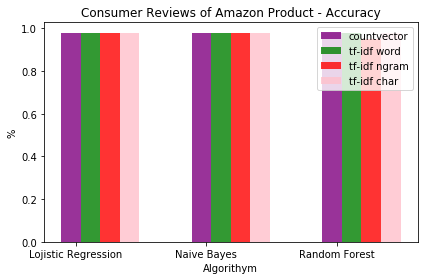

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
cv = (accuracy, accuracy4, accuracy8)
word = (accuracy1, accuracy5, accuracy9)
ngram = (accuracy2, accuracy6, 0.95)
char = (accuracy3, accuracy7, accuracy11)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, cv, bar_width,
alpha=opacity,
color='purple',
label='countvector')

rects2 = plt.bar(index + bar_width, word, bar_width,
alpha=opacity,
color='g',
label='tf-idf word')

rects3 = plt.bar(index + bar_width*2, ngram, bar_width,
alpha=opacity,
color='red',
label='tf-idf ngram')

rects3 = plt.bar(index + bar_width*3, char, bar_width,
alpha=opacity,
color='pink',
label='tf-idf char')

plt.xlabel('Algorithym')
plt.ylabel('%')
plt.title('Consumer Reviews of Amazon Product - Accuracy')
plt.xticks(index + bar_width/4, ('Lojistic Regression', 'Naive Bayes', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()

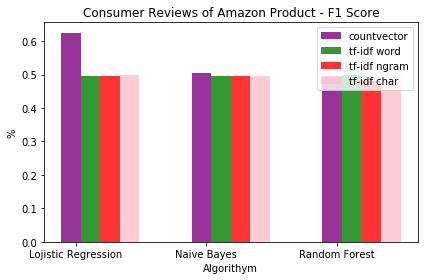

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
cv = (f1_score, f1_score4, f1_score8)
word = (f1_score1, f1_score5, f1_score9)
ngram = (f1_score2, f1_score6, 0.48)
char = (f1_score3, f1_score7, f1_score11)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, cv, bar_width,
alpha=opacity,
color='purple',
label='countvector')

rects2 = plt.bar(index + bar_width, word, bar_width,
alpha=opacity,
color='g',
label='tf-idf word')

rects3 = plt.bar(index + bar_width*2, ngram, bar_width,
alpha=opacity,
color='red',
label='tf-idf ngram')

rects3 = plt.bar(index + bar_width*3, char, bar_width,
alpha=opacity,
color='pink',
label='tf-idf char')

plt.xlabel('Algorithym')
plt.ylabel('%')
plt.title("Consumer Reviews of Amazon Product - F1 Score")
plt.xticks(index + bar_width/4, ('Lojistic Regression', 'Naive Bayes', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()